In [1]:
library(expm)
library(markovchain)
library(diagram)
library(pracma)

stateNames <- c("Rain","Nice","Snow")
Oz <- matrix(c(.5,.25,.25,.5,0,.5,.25,.25,.5),
             nrow=3, byrow=TRUE)
row.names(Oz) <- stateNames; colnames(Oz) <- stateNames
Oz

#Since the p-value shown is above 0.05, we do not reject the null hypothesis that the sequence follows the Markov property.

Warning message:
"package 'expm' was built under R version 3.5.3"Loading required package: Matrix

Attaching package: 'expm'

The following object is masked from 'package:Matrix':

    expm

Warning message:
"package 'markovchain' was built under R version 3.5.3"Package:  markovchain
Version:  0.6.9.16
Date:     2019-07-21
BugReport: http://github.com/spedygiorgio/markovchain/issues

Warning message:
"package 'diagram' was built under R version 3.5.2"Loading required package: shape
Warning message:
"package 'shape' was built under R version 3.5.2"Warning message:
"package 'pracma' was built under R version 3.5.3"
Attaching package: 'pracma'

The following objects are masked from 'package:expm':

    expm, logm, sqrtm

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



,Rain,Nice,Snow
Rain,0.50,0.25,0.25
Nice,0.50,0.00,0.50
Snow,0.25,0.25,0.50


,Rain,Nice,Snow
Rain,0.406,0.203,0.391
Nice,0.406,0.188,0.406
Snow,0.391,0.203,0.406


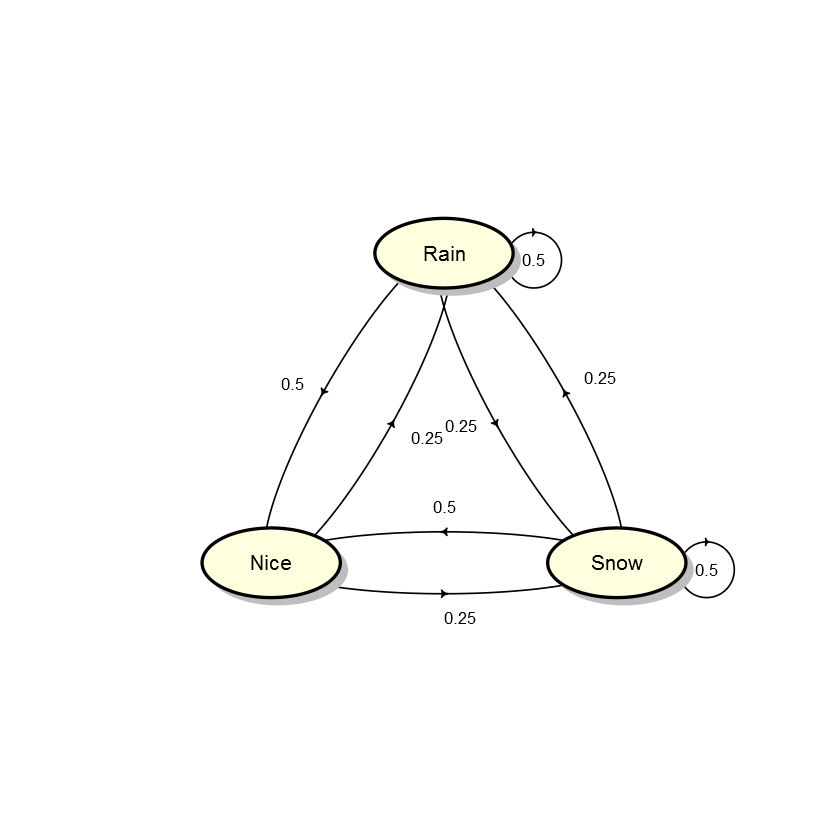

In [2]:
plotmat(Oz,pos = c(1,2), 
        lwd = 1, box.lwd = 2, 
        cex.txt = 0.8, 
        box.size = 0.1, 
        box.type = "circle", 
        box.prop = 0.5,
        box.col = "light yellow",
        arr.length=.1,
        arr.width=.1,
        self.cex = .4,
        self.shifty = -.01,
        self.shiftx = .13,
        main = "")

Oz3 <- Oz %^% 3
round(Oz3,3)

In [3]:
u <- c(1/3, 1/3, 1/3)
round(u %*% Oz3,3)

Rain,Nice,Snow
0.401,0.198,0.401


In [4]:
library(markovchain)
library(diagram)
# define a transition matrix
tmA <- matrix(c(0.25,0.65,0.1,.25,0.25,.5,.35,.25,0.4),nrow = 3, byrow = TRUE)
# create the DTMC
dtmcA <- new("markovchain",transitionMatrix=tmA, states=c("No Rain","Light Rain","Heavy Rain"), name="MarkovChain A") 
dtmcA

MarkovChain A 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 No Rain, Light Rain, Heavy Rain 
 The transition matrix  (by rows)  is defined as follows: 
           No Rain Light Rain Heavy Rain
No Rain       0.25       0.65        0.1
Light Rain    0.25       0.25        0.5
Heavy Rain    0.35       0.25        0.4


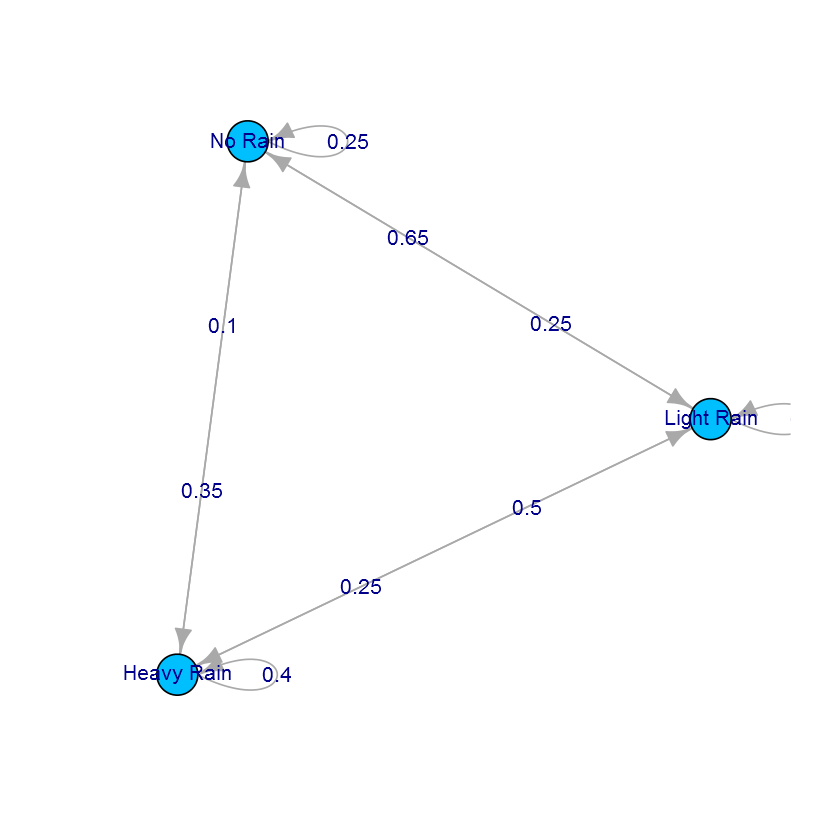

In [5]:
plot(dtmcA)

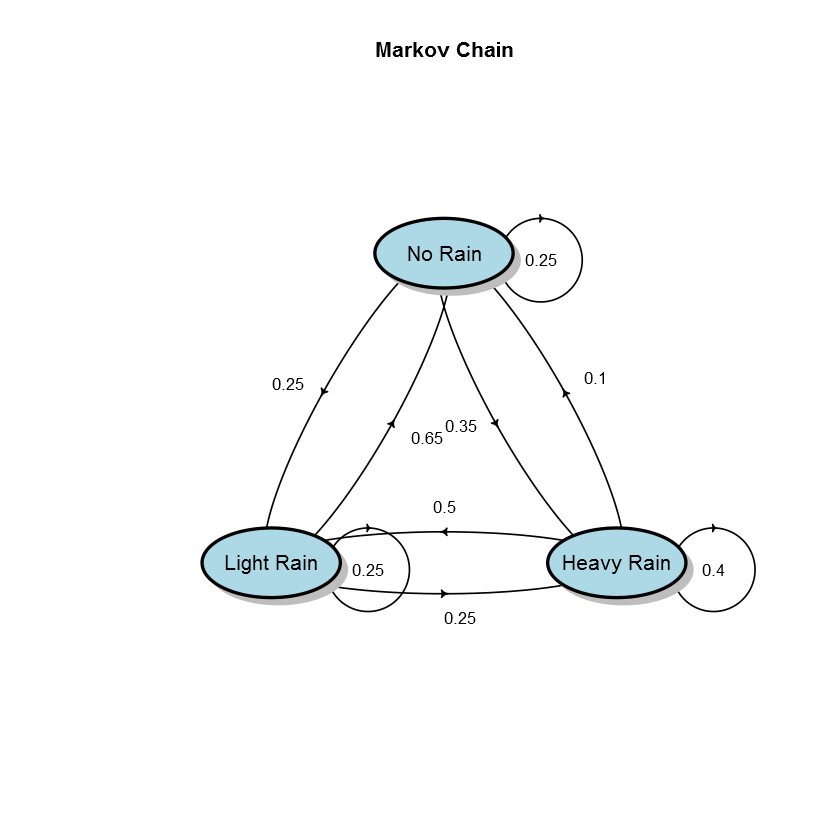

In [6]:
stateNames <- c("No Rain","Light Rain","Heavy Rain")
row.names(tmA) <- stateNames; colnames(tmA) <- stateNames
plotmat(tmA,pos = c(1,2), 
        lwd = 1, box.lwd = 2, 
        cex.txt = 0.8, 
        box.size = 0.1, 
        box.type = "circle", 
        box.prop = 0.5,
        box.col = "light blue",
        arr.length=.1,
        arr.width=.1,
        self.cex = .6,
        self.shifty = -.01,
        self.shiftx = .14,
        main = "Markov Chain")

In [7]:
# It is possible to simulate states distribution after n-steps N STEPS
initialState<-c(0,1,0)
steps<-2
finalState<-initialState*dtmcA^steps #using power operator
finalState

No Rain,Light Rain,Heavy Rain
0.3,0.35,0.35


In [8]:
# As well as steady states distribution
steadyStates(dtmcA)

No Rain,Light Rain,Heavy Rain
0.2850877,0.3640351,0.3508772
